Homework 3 NBA Stats Data

**Data Set Used:** https://www.kaggle.com/datasets/wyattowalsh/basketball

In [28]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wyattowalsh/basketball")

print("Path to dataset files:", path)

100%|██████████| 697M/697M [00:29<00:00, 24.8MB/s] 

Extracting files...


Path to dataset files: /Users/admin/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231


In [3]:
!conda install -y lxml beautifulsoup4 html5lib
!pip install lxml beautifulsoup4 html5lib


Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: osx-64
doneecting package metadata (repodata.json): - 
doneing environment: \ 

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - beautifulsoup4
    - html5lib
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.13.5      |     pyha770c72_0          86 KB  conda-forge
    html5lib-1.1               |     pyhd8ed1ab_2          93 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         179 KB

The following NEW packages will be INSTALLED:

  html5lib           conda-forge/noarch::html5lib-1.1-pyhd8ed1ab_2 

The following packages will be UPDATED:

  beautifulsoup4     pkgs/main/osx-64::beautifulsoup4-4.12~ --> conda-forge/noarch::beautifulso

In [29]:
os.chdir("/Users/admin/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231")
print(os.listdir())
os.chdir("csv")
df = pd.read_csv("common_player_info.csv")
df.head()

['nba.sqlite', 'csv']


,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,team_id,team_name,team_abbreviation,team_code,team_city,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,Duke/USA,6-10,240.0,5.0,30,Forward,Inactive,N,1610612757,Trail Blazers,POR,blazers,Portland,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N
1,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,UCLA/USA,7-2,225.0,20.0,33,Center,Inactive,N,1610612747,Lakers,LAL,lakers,Los Angeles,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y
2,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,San Jose State/France,6-6,235.0,7.0,9,Forward-Guard,Inactive,N,1610612758,Kings,SAC,kings,Sacramento,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,California/USA,6-9,245.0,13.0,3,Forward,Inactive,N,1610612763,Grizzlies,VAN,grizzlies,Vancouver,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N
4,76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06 00:00:00,Indiana,USA,Indiana/USA,6-7,220.0,5.0,5,Forward,Inactive,N,1610612744,Warriors,GOS,warriors,Golden State,HISTADD_tom_abernethy,1976.0,1980.0,N,Y,Y,1976,3,43,N


**Question 1:**

I accessed this dataset from https://www.kaggle.com/datasets/wyattowalsh/basketball, which is a dataset that includes teams, players, games, box scores, and play by play data. I used this data in September 2025, and it is owned by Wyatt Walsh. It is a CC0 license and a public domain. Kaggle user Wyatt Walsh and his orginal sources are cited on his dataset page. 

**Question 2:**

In [31]:
df.shape

(4171, 33)

We can see that this dataset has 3,632 observations and 33 variables.

**Question 3:**

In [32]:
df.dtypes

person_id                             int64
first_name                           object
last_name                            object
display_first_last                   object
display_last_comma_first             object
display_fi_last                      object
player_slug                          object
birthdate                            object
school                               object
country                              object
last_affiliation                     object
height                               object
weight                              float64
season_exp                          float64
jersey                               object
position                             object
rosterstatus                         object
games_played_current_season_flag     object
team_id                               int64
team_name                            object
team_abbreviation                    object
team_code                            object
team_city                       

In common_player_info.csv, we see a mix of types. We see integer columns, float columns, and string columns. This dataset has numerical and categorical data, which can be analyzed differently.

**Question 4:**

In [33]:
df.isna().sum()

person_id                             0
first_name                            0
last_name                             0
display_first_last                    0
display_last_comma_first              0
display_fi_last                       0
player_slug                           0
birthdate                             0
school                               15
country                               1
last_affiliation                      0
height                               96
weight                              100
season_exp                            0
jersey                              980
position                             63
rosterstatus                          0
games_played_current_season_flag      0
team_id                               0
team_name                           702
team_abbreviation                   702
team_code                           702
team_city                           702
playercode                            1
from_year                            15


Yes, there are some missing values or NaN values, as in certain columns like school, draft information, or team details there are some NaN values seen, This makes sense because some players were undrafted or did not attend college.

**Question 5:**

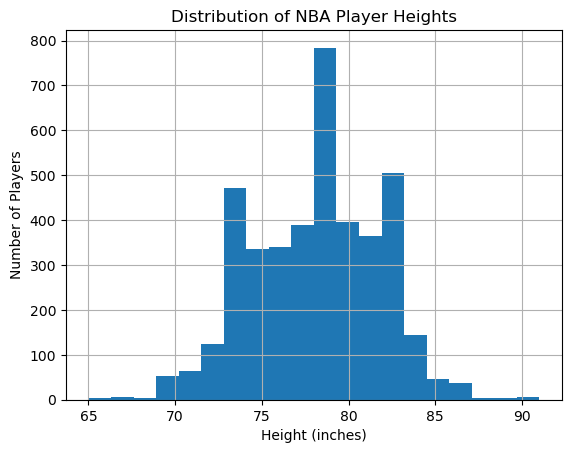

In [37]:
def to_inches(h):
    try:
        feet, inches = h.split('-')
        return int(feet) * 12 + int(inches)
    except:
        return None

df["height_inches"] = df["height"].apply(to_inches)

df["height_inches"].dropna().hist(bins=20)
plt.xlabel("Height (inches)")
plt.ylabel("Number of Players")
plt.title("Distribution of NBA Player Heights")
plt.show()

There were no diagrams to recreate on the main website for the database, so I just made a histogram that shows the height distribution of NBA player heights. This graph shows that they are mostly around 74 to 82 inches tall, and very few players are either shorter than 70 inches or taller than 85 inches. This makes sense since the NBA is a very tall leauge with most people making it being very tall.

**Question 6:**

So for my own question, I am choosing to determine whether players from outside the United States tend to be taller than players from the U.S.?

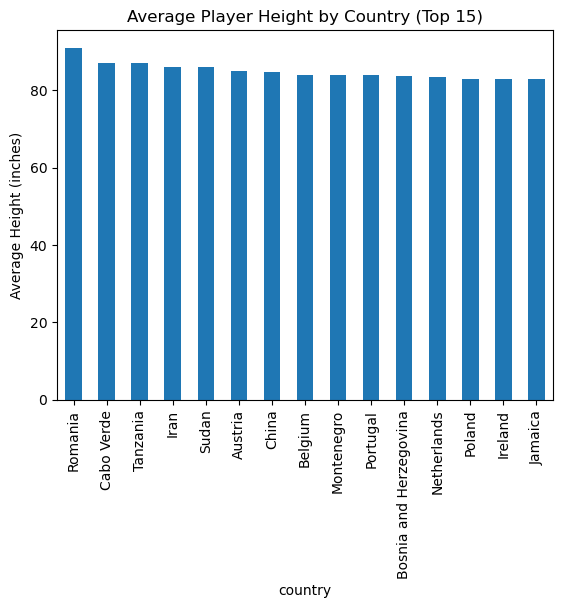

In [51]:
df = pd.read_csv("common_player_info.csv")

def to_inches(h):
    try:
        f, i = h.split('-')
        return int(f) * 12 + int(i)
    except:
        return None

df["height_inches"] = df["height"].apply(to_inches)

avg_heights = df.groupby("country")["height_inches"].mean().sort_values(ascending=False).dropna()

avg_heights.head(15).plot(kind="bar")
plt.ylabel("Average Height (inches)")
plt.title("Average Player Height by Country (Top 15)")
plt.show()

This bar chart shows that all of the top 15 tallest average heights for players are outside of the United States, which means that players from other countries often have taller players than the United States. The Unites States has the most players for sure but many European players are selected for how they stand out physically.

**Question 7:**


In [52]:
subset = df[["country", "height_inches"]]
subset.to_csv("subset_height_country.csv", index=False)
subset.head()

,country,height_inches
0,USA,82.0
1,USA,86.0
2,France,78.0
3,USA,81.0
4,USA,79.0


Here I created a new dataframe which only contain the columns country and height_inches. These are the only two variables I need to answer my question, so then I saved them to a CSV file called subset_height_country.csv.

**Question 8:**


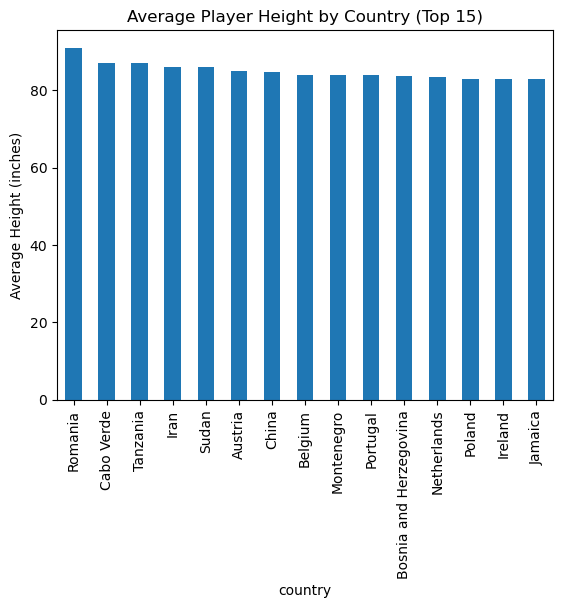

Average height (U.S.): 77.77165354330708
Average height (non-U.S.): 80.77806122448979


In [53]:

df = pd.read_csv("subset_height_country.csv")

avg_heights = df.groupby("country")["height_inches"].mean().sort_values(ascending=False).dropna()

avg_heights.head(15).plot(kind="bar")
plt.ylabel("Average Height (inches)")
plt.title("Average Player Height by Country (Top 15)")
plt.show()

print("Average height (U.S.):", df[df["country"] == "USA"]["height_inches"].mean())
print("Average height (non-U.S.):", df[df["country"] != "USA"]["height_inches"].mean())

This shows that there is a significant difference in average heights between the US and international heights, and international players are on average about 3 inches taller than the US players. 